# Math for ML: Linear Algebra

In this lesson, I'll continue on with the math for machine learning sequence by introducing the important topic of linear algebra. I'll also introduce the important NumPy library and use it to illustrate the various linear algebra concepts we'll discuss. A basic understanding of linear algebra is absolutely fundamental to machine learning. In some sense ML basically *is* an application of linear algebra.

The topics we will discuss in this lesson are:
- Numpy and its basic array operations
- Vectors and operations on vectors, including scalar multiplication, vector addition, the dot product, norms, cosine similarity
- Matrices and operations on matrices, including matrix multiplication, linear maps, the singular value decomposition
- The very basics of tensors and some examples
- Broadcasting rules and some examples

Let's get started.

## Numpy

Though linear algebra *can* be done in ordinary python, it's not the optimal way to do so. For one thing, numpy makes linear algebra routines highly efficient on the back end by compiling them down to low-level code that executes much faster than the equivalent python code would. For another thing, numpy offers some helpful abstractions that make linear algebra operations much easier and more intuitive to do. 

I'll start by importing numpy. We'll cover the important usages of each of these tools as we need them. Typically by convention, numpy is imported with the name `np`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
# this makes every line of a cell print instead of just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Arrays and Types

The fundamental object of numpy is the **array**. An array is very similar to a python list but supports all the numpy operations. To define an array, we can just define a python list and wrap it inside the function `np.array`. I'll create an array called `x` out of the list `[1, 2, 3, 4, 5]`.

In [3]:
x = np.array([1, 2, 3, 4, 5]); x

array([1, 2, 3, 4, 5])

Just like python numbers, numpy arrays are typed. We can have an array of ints, an array of floats, an array of strings, etc. Not *all* objects can be put inside a numpy array though. Only immutable types like ints, floats, strings, or tuples. To get the type of the numbers in an array, call the method `dtype` on `x`. In the array I just defined, the type is `int64`, which is the numpy equivalent of the regular python `int`, which has 64 bits.

In [4]:
x.dtype

dtype('int64')

The other type of importance is of course the float, which is `float64` in numpy. We can specify the type either by passing floats into the array initially, or by recasting the array explicitly using the `astype` method.

In [5]:
x = x.astype('float64')
x.dtype

dtype('float64')

Since arrays contain multiple values it's essential to know their **shape**. The shape of an array is the number of elements in each dimension of the array. To get the size of an array, use the `shape` method. It will return the number of values in each dimension of the array.

In [6]:
x.shape

(5,)

The number of different dimensions an array has is called its **rank**. Equivalently, the rank is just the length of the shape tuple.

The above array `x` is a rank-1 array with 5 elements. We can also define arrays with two, three, or any other number of dimensions we like. In math these arrays sometimes have special names depending on their dimension:
- A rank-0 array is called a **scalar** (i.e. just a single number).
- A rank-1 array is called a **vector**.
- A rank-2 array is called a **matrix**.
- A rank-3 or higher array is called a **tensor**.

Here's an example of each. Next to each I print out their numpy shapes followed by the array itself.

In [7]:
scalar = np.array(1.5)
scalar.shape
scalar

()

array(1.5)

In [8]:
vector = np.array([1, 2, 3])
vector.shape
vector

(3,)

array([1, 2, 3])

In [9]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
matrix.shape
matrix

(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
tensor = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
tensor.shape
tensor

(2, 2, 3)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

### Element-Wise Array Operations

As you'd expect, we can also do arithmetic with arrays as well. Suppose for example we have two arrays like so.

In [11]:
x = np.array([1, 2, 3]); x
y = np.array([4, 5, 6]); y

array([1, 2, 3])

array([4, 5, 6])

We can efficiently operate on all numbers in these arrays by using **element-wise arithmetic**. The idea is to treat arrays like numbers. We can add, subtract, multiply, divide them. We can apply common functions like exponentials or logarithms. The difference for arrays is that these operations are applied on each number individually.

For example, suppose we want to multiply `x` and `y` together. If we multiply each element index-by-index, or element-wise, we'd get something like this:
```python
x * y = [1 * 4, 2 * 5, 3 * 6] = [4, 10, 18].
```

In [12]:
x * y

array([ 4, 10, 18])

We can similarly do element-wise operations for addition, subtraction, multiplication by constants, exponentiation, even division.

In [13]:
x + y
x - y
2 * x
x ** y
x / y

array([5, 7, 9])

array([-3, -3, -3])

array([2, 4, 6])

array([  1,  32, 729])

array([0.25, 0.4 , 0.5 ])

We can also take element-wise exponents, logs, sines, cosines, whatever we were doing with ints and floats before.

In [14]:
np.exp(x)
np.log(x)
np.sin(x)
np.cos(x)

array([ 2.71828183,  7.3890561 , 20.08553692])

array([0.        , 0.69314718, 1.09861229])

array([0.84147098, 0.90929743, 0.14112001])

array([ 0.54030231, -0.41614684, -0.9899925 ])

Operations like this make it really convenient and efficient to perform operations on large arrays of data, which is very helpful in machine learning. We'll do it *a lot* going forward, without even thinking about it.

## Vectors

### Definition

Now that we have the array data type in hand we can proceed to linear algebra. The most fundamental object of linear algebra is the **vector**. In mathematical terms, a (real-valued) vector is a rank-1 array $\mathbf{v}$ containing $n$ real numbers $v_0,v_1,v_2,\cdots,v_{n-1}$, called **elements**:
$$\mathbf{v} = (v_0,v_1,v_2,\cdots,v_{n-1}).$$

**Aside:** Note my choice to use 0-indexing. A a vector of $n$ numbers goes from $v_0,v_1,v_2,\cdots,v_{n-1}$. This differs from the usual 1-indexing convention used in math, but agrees with the python indexing convention. I chose it so it's easier to go back and forth between math and code in this book.

Vectors must have well-defined operations of addition, and scalar multiplication.
- If $\mathbf{v}=(v_0,\cdots,v_{n-1}), \mathbf{w}=(w_0,\cdots,w_{n-1})$ are two vectors of size $n$, then so is their sum (or difference) defined by
$$\mathbf{v} + \mathbf{w} = (v_0+w_0, v_1+w_1, \cdots, v_{n-1}+w_{n-1}).$$
- If $\mathbf{v}=(v_0,\cdots,v_{n-1})$ is a vector of size $n$ and $c$ is a scalar, then their product is also a vector defined by
$$c\mathbf{v} = (cv_0,cv_1,\cdots,cv_{n-1}).$$

Mathematicians like to call the space in which these vectors live the **vector space**, denoted $\mathbb{R}^n$ for a vector space of size $n$. To say a vector $\mathbf{v}$ is in the vector space we'd write $\mathbf{v} \in \mathbb{R}^n$.

Numpy easily supports both of these operations. Here's an example where we add to vectors, and scalar multiply another. Things happen exactly as you'd expect.

In [15]:
x = np.array([1, 1, 1, 1, 1])
y = np.array([1, 1, 1, 1, 1])
x + y
x - y

array([2, 2, 2, 2, 2])

array([0, 0, 0, 0, 0])

In [16]:
x = np.array([1, 1, 1, 1, 1])
c = 10
c * x

array([10, 10, 10, 10, 10])

### Visualizing Vectors

Though we obviously can't mentally visualize an arbitrary $n$ dimensional space, in the case of a $n=2$ dimensions we can easily visualize a vector as an arrow pointing in the x-y plane.

To plot a vector I'll import a utils function `plot_vector` I created, which uses the matplotlib `plt.quiver` function plus some styling to plot a simple vector. Don't worry too much about the details of this implementation unless you're curious, in which case just type `??plot_vector` into a cell to see the source code for it.

I'll plot the vector $\mathbf{v} = (1, 2)$, identifying the components with the axes as $x=1$ and $y=2$. Notice how the arrow begins at the origin and terminates at the point $(1,2)$. The vector *points* in the direction of $(1,2)$.

Feel free to play around with different vectors and plot them. Just make sure they're 2D. Note you may need to adjust the scales of the plot for some choices of `v`, which you can do with the `xlim` and `ylim` keywords.

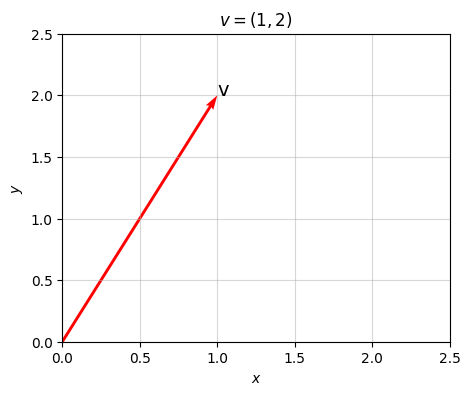

In [17]:
v = np.array([1, 2])
plot_vectors(v, xlim=(0, 2.5), ylim=(0, 2.5), title=f'$v={v[0],v[1]}$')

That's all fine for 2D vectors. But what about $n$ dimensions? Perhaps the best thing to do there is to just imagine you have an arrow just like above, but instead of pointing in a 2D plane, it's pointing in an $n$ dimensional space. For example, you could imagine an arrow pointing in 3D space just fine, right?

We can also visualize what the operations of vector addition and scalar multiplication look like in this simple case of 2D vectors. For vector addition, imagine you have two vectors $\mathbf{v}$ and $\mathbf{w}$. Plot them just like above, but imagine the vector $\mathbf{w}$ starts at the *head* of $\mathbf{v}$ instead of at the origin. Now, draw a vector from the origin to the head of $\mathbf{w}$. *That* vector will then be the sum of the two, $\mathbf{v}+\mathbf{w}$.

Here's an example. I'll use a helper function to plot the sum of two vectors $\mathbf{v}=(1,1)$ and $\mathbf{w}=(1,3)$. Their sum should be the vector $\mathbf{v}+\mathbf{w}=(2,4)$, which should exactly touch the tail of the two vectors stacked on top of each other. Again, feel free to play around with this function for different choices of $\mathbf{v}$ and $\mathbf{w}$ to get a sense for what's going on.

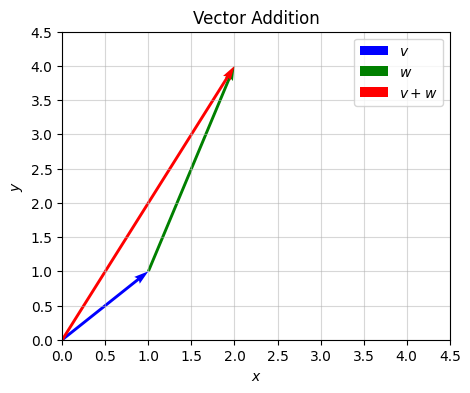

In [18]:
v = np.array([1, 1])
w = np.array([1, 3])
plot_vector_add(v, w, xlim=(0, 4.5), ylim=(0, 4.5))

To visualize scalar multiplication, we can just plot a vector along with its scaled vector to get an idea what's going on. Let's do that below for a vector $\mathbf{v}=(1,1)$ with a scalar $c=2$. The original vector is the black arrow and the scaled one is the orange one. Notice that what's going on is the vector just gets *scaled* in length by the factor of $c=2$. That's why a scalar is called a scalar. It scales the length of a vector!

I'll also plot the same vector scaled by $c=-1$ to show what scaling by a negative number does. It just flips the vector in the opposite direction. Again, feel free to play with this function by using different choices for `c`. If you don't want to plot the negative scaling, set `include_neg=False`.

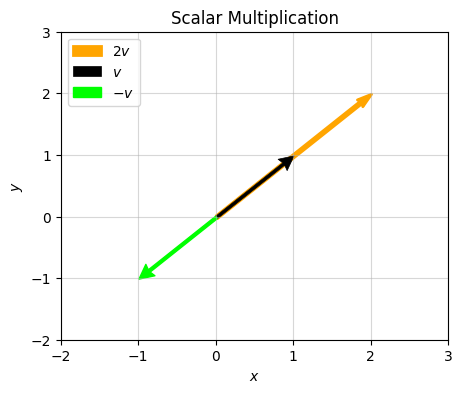

In [19]:
v = np.array([1, 1])
c = 2
plot_scalar_mult(v, c, xlim=(-2, 3), ylim=(-2, 3), include_neg=True)

### Dot Products

Another fundamental operation we can do with vectors is take their **dot product**, also called the **inner product**. The dot product is a way of taking two *vectors* and getting a *scalar* out of them. Why would we want to do this? It turns out that the dot product provides information about *both* the length (or magnitude) of the vector and its angle (or direction). In essence, the dot product captures the *geometry* of vector spaces.

The dot product between two vectors can be defined as the sum of their element-wise multiplication. That is, if
$\mathbf{v}=v_0,v_1,\cdots,v_{n-1}$ and $\mathbf{w}=w_0,w_1,\cdots,w_{n-1}$ are two vectors, then their dot product $\mathbf{v} \cdot \mathbf{w}$ (pronounced "v dot w") is given by
$$\mathbf{v} \cdot \mathbf{w} = \sum_{i=0}^{n-1} v_i w_i = v_0 w_0 + v_1 w_1 + \cdots + v_{n-1} w_{n-1}.$$

**Aside:** Note the appearance of the fancy symbol $\sum_{i=0}^{n-1}$. This means "sum over each integer $i$ from $0$ to $n-1$ of each product $v_i w_i$". It's just a short-hand way of writing out the full sum $v_0 w_0 + v_1 w_1 + \cdots + v_{n-1} w_{n-1}$. The value $i$ is called a *dummy index*. It can be called whatever we like, so long as it sums over the same numbers. We'll use this summation notation a lot in future lessons. It's nothing to worry about. Just a way to write that we're summing up some numbers.

Let's do an example of how to calculate the dot product. Consider two vectors $\mathbf{v}=(2, 0.5)$ and $\mathbf{w}=(1, 3)$.

We can calculate their dot product a few different ways. 
- One way is to element-wise multiply the vectors together with, which is what `v * w` means in numpy. This gives a new vector $(2*1,0.5*3)$. We then take the *sum* of this new vector by calling `np.sum`. In one line, this would just be `np.sum(v * w)`.
- Another way is to simply use the function `np.dot`, which calculates the dot product directly.
- Yet another way is to use the `@` symbol and the transpose method `T`, which I'll define shortly when we get to matrix multiplication: `v.T @ w`.

Observe the output to each of these 3 methods is exactly the same, as it should be: $\mathbf{v} \cdot \mathbf{w} = 3.5$.

In [20]:
v = np.array([2, 0.5])
w = np.array([1, 3])

In [21]:
np.sum(v * w)
np.dot(v, w)
v.T @ w

3.5

3.5

3.5

### Norms and Cosine Similarity

Great, so we just introduced 3 ways to calculate the number 3.5. What of it? It turns out this number says something about the *angle* between these two vectors.

Before discussing how to calculate the angle between two vectors, let's discuss the simpler idea of how to calculate the *length* of a vector. It's just the square root of the vector's dot product with itself. For technical reasons, this is usually called the **2-norm** in machine learning instead of the length, and written
$$||\mathbf{v}||_2 = \sqrt{\mathbf{v} \cdot \mathbf{v}} = \sqrt{\sum_{i=1}^n v_i^2}.$$

**Aside:** There are other ways of defining norms as well that don't correspond to length, for example the **1-norm**
$$||\mathbf{v}||_1 = \sum_{i=1}^n |v_i|.$$
The 1-norm is sometimes used in machine learning since it has subtly different properties than the 2-norm.

The 2-norm corresponds to the Euclidean length you learn about in geometry, which is essentially just the Pythagorean Theorem. If $\mathbf{v}=(x, y)$ for example, then its length would be the 2-norm 
$$||\mathbf{v}||_2 = \sqrt{\mathbf{v} \cdot \mathbf{v}} = \sqrt{x^2+y^2}.$$
That is, $||\mathbf{v}||_2$ is just the hypotenuse of a right triangle with base $x$ and height $y$.

Here's a calculation of the 2-norm of the two vectors $\mathbf{v}, \mathbf{w}$ we defined above. I'll define a function `two_norm(v)`, which will calculate the dot product of a vector with itself using `np.dot`, then take its square root with `np.sqrt`, returning the result.

In [22]:
def two_norm(v):
    return np.sqrt(np.dot(v, v))

two_norm(v)
two_norm(w)

2.0615528128088303

3.1622776601683795

Observe that the length of $\mathbf{w}$ is larger than the length of $\mathbf{v}$. We can see this by plotting these two vectors next to each other.

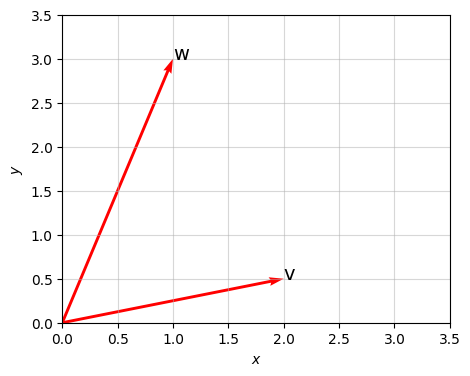

In [23]:
plot_vectors([v, w], xlim=(0, 3.5), ylim=(0, 3.5), labels=['v', 'w'])

In this plot we can also see the angle between these two vectors, call it $\theta$. It looks visually like $\theta \approx 45^{\circ}$ or so. To calculate $\theta$ exactly we can use the following formula:
$$\cos\theta = \cos(\mathbf{v}, \mathbf{w}) = \frac{\mathbf{v} \cdot \mathbf{w}}{||\mathbf{v}||_2 ||\mathbf{w}||_2}.$$
That is, the cosine of the angle between two vectors is their dot product divided by both their lengths. 

**Aside:** If you want a proof of this formula, convince yourself that the following formula is true: $||\textbf{v}||_2^2 + ||\textbf{w}||_2^2 = (\textbf{v} \cdot \textbf{w})^2$.
Then, use the Pythagorean Theorem and the the trig definition of $\cos\theta$ on a right triangle with side lengths $||\textbf{v}||_2$ and $||\textbf{w}||_2$.

In machine learning this formula for $\cos\theta$ is called the **cosine similarity** between two vectors. It gives a length-invariant measure of how much two vectors "agree" with each other. Since $-1 \leq \cos\theta \leq 1$,
- If $\cos\theta$ is close to $1$ it means their angle is almost zero, hence they're sitting right on top of each other, and agree highly. 
- If $\cos\theta$ is close to $-1$ it means they're parallel to each other but face the opposite direction, which means they are in some sense opposites of each other. 
- If $\cos\theta = 0$ then the two vectors are perpendicular to each other, and the two vectors are said to be **orthogonal** to each other. Orthogonal vectors disagree highly with each other. They're nothing alike in some sense.
We'll see cosine similarity show up again when we want to see how similar two pieces of data are to each other.

Let's calculate the cosine similarity for our two vectors. I'll define a function `cosine_similarity(v, w)` to do this. It seems like the two vectors above should agree reasonably, but not perfectly. If their angle is about 45&deg;, then their cosine similarity should be something like 0.5, which is about what we get.

In [24]:
def cosine_similarity(v, w):
    return np.dot(v, w) / (two_norm(v) * two_norm(w))

cosine_similarity(v, w)

0.5368754921931592

## Matrices

### Definition

The next step up from rank-1 arrays are the rank-2 arrays, called matrices. A **matrix** is a rank-2 array of real numbers. That is, a matrix $\mathbf{A}$ contains $m$ rows and $n$ columns of real numbers $A_{i,j}$. Note there are then $n\cdot m$ total elements in $\mathbf{A}$. In mathematical notation we'd express $\mathbf{A}$ in a grid like this,
$$
\mathbf{A} = 
\begin{pmatrix}
    A_{0,0} & A_{0,1} & \dots & A_{0,n-1} \\
    A_{1,0} & A_{1,1} & \dots & A_{1,n-1} \\
    \vdots & \vdots & \ddots & \vdots \\
    A_{m-1,0} & A_{m-1,1} & \dots & A_{m-1,n-1}
\end{pmatrix}.
$$

**Aside:** I'll sometimes write the elements of an array using subscripts like $A_{i,j}$ as above, and sometimes using the usual array notation $A[i,j]$. The choice will depend on the situation. I'm using the subscript convention here because it's most common when covering math topics like linear algebra.

Just as a mathematician might write $\mathbf{v} \in \mathbb{R}^n$ to say a vector is an array of $n$ real numbers, he'd write $\mathbf{A} \in \mathbb{R}^{m \times n}$ to say that a matrix is a real-valued array of shape $(m,n)$.

A simple example of a matrix might be the $(3,3)$ matrix
$$
\mathbf{A} = 
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{pmatrix}.
$$

In [25]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Indexing into a matrix in numpy is different than in a regular python lists of lists. If we want to to get the $(2, 1)$ element of the above matrix, which is $A_{2,1}=8$, we'd write `A[2, 1]`, *not* `A[2][1]` like with a list of lists.

Slicing is done pretty much the same as with lists. If we want the first row of the matrix, which is $A_{0, :}=(1 \ \ 2 \ \ 3)$, we'd write `A[0, :]`.

Negative indexing works just fine as well. We can efficiently get the bottom right element $A_{2,2}=9$ for example by using `A[-1, -1]`.

In [26]:
A[2, 1]
A[0, :]
A[-1, -1]

8

array([1, 2, 3])

9

Numpy also supports more complex indexing than python lists do. We're free to pass in a list of indices we want and have them all returned in a new array. For example, if we only want the second and third columns of `A`, we can write either `A[:, 1:]` *or* `A[:, [1, 2]]`.

In [27]:
A[:, 1:]
A[:, [1, 2]]

array([[2, 3],
       [5, 6],
       [8, 9]])

array([[2, 3],
       [5, 6],
       [8, 9]])

### Special Matrices

A matrix has a subset of elements that we give a special name. The elements of a matrix $\mathbf{A}$ where $i=j$ are called the **diagonal** of $\mathbf{A}$. For example, the diagonal of the matrix
$$
\textbf{A} = 
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{pmatrix}.
$$
is the elements $A_{0,0}=1, A_{1,1}=5, A_{2,2}=9$. We usually write the diagonal as a vector like this
$$\text{diag}(\mathbf{A}) = (1, 5, 9).$$

The diagonal is important because it in some sense specifies the scale of the matrix. It's also a line of symmetry for the matrix. The elements to the upper right of the diagonal are called the **upper diagonal**, and the ones to the lower left the **lower diagonal**.

To get the diagonal of a matrix in numpy, use the `np.diag` function.

In [28]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); A
diag_A = np.diag(A); diag_A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([1, 5, 9])

Another important operation that we can do to a matrix is take its transpose. The **transpose** of a matrix is just the same matrix, but with the row and column indexes swapped. Equivalently, it's the matrix whose elements are flipped about its diagonal.

More formally, if a matrix $\textbf{A}$ has shape $(m,n)$ and its elements are written $A_{i,j}$, then the transpose of $\textbf{A}$ is defined as the new matrix $\textbf{A}^\top$ of shape $(n,m)$ whose elements are given by
$$A^{\top}_{i,j}=A_{j,i}.$$
The matrix $\textbf{A}^\top$ is usually pronounced "A transpose".

In our running example, we'd have
$$
\textbf{A} = 
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{pmatrix} \quad \Longrightarrow \quad
\textbf{A}^\top = 
\begin{pmatrix}
    1 & 4 & 7 \\
    2 & 5 & 8 \\
    3 & 6 & 9 \\
\end{pmatrix}.
$$

You can easily convince yourself that transposing a matrix twice gives the same matrix back: $(\textbf{A}^\top)^\top=\textbf{A}$.

Why would we care about the transpose? It's in some sense equivalent, or *dual* to $\textbf{A}$. It provides the same information as $\textbf{A}$, but is sometimes easier to work with in numerical computations. It has some other theoretical properties as well that I won't go into.

Here's an example of the transpose operation in numpy on a $(3,2)$ matrix. The output should be a $(2,3)$ matrix with rows and columns swapped. To transpose a matrix `A` we can use `A.T`, or alternatively `np.transpose`.

In [29]:
A = np.array([[1, 2], [3, 4], [5, 6]]); A
A_transpose = A.T; A_transpose
A.shape, A_transpose.shape

array([[1, 2],
       [3, 4],
       [5, 6]])

array([[1, 3, 5],
       [2, 4, 6]])

((3, 2), (2, 3))

Here are a few general matrices that come up so often it's worth being aware of them.
- **Identity Matrix:** This is a matrix whose values are 1 on the diagonal and 0 everywhere else. It's usually denoted by $\mathbf{I}$ or $\mathbf{1}$. In numpy, use the `np.eye(n)` function to create an $(n,n)$ identity matrix.
- **Ones Matrix:** This is a matrix of all ones. Sometimes denoted $\mathbf{J}$. In numpy, use the `np.ones(shape)` function to create an array of ones of shape `shape`.
- **Zeros Matrix:** This is a matrix of all zeros, usually just denoted $\mathbf{0}$. In numpy, use the `np.zeros(shape)` function to create an array of zeros of shape `shape`.

In [30]:
I = np.eye(2); I
J = np.ones((2, 2)); J
O = np.zeros((2, 2)); O

array([[1., 0.],
       [0., 1.]])

array([[1., 1.],
       [1., 1.]])

array([[0., 0.],
       [0., 0.]])

### Matrix Multiplication

On top of the usual element-wise operations that any array obeys, matrices also have *another* special kind of multiplication. You probably have seen this version of matrix multiplication before in school, taught as the "standard" way to multiply matrices. It's no exaggeration to say that matrix multiplication is the single most important operation in machine learning. It's the bread and butter operation of the most important machine learning algorithms, especially neural networks.

Let $\mathbf{A}$ and $\mathbf{B}$ be two matrices, where $\mathbf{A}$ has shape $(m,n)$ and $\mathbf{B}$ has shape $(n,p)$. Then we can define a new operation called **matrix multiplication** on these two matrix to get a new matrix $\mathbf{C}$ of shape $(m,p)$ whose elements are
$$C_{i,k} = \sum_{j=1}^n A_{i,j}B_{j,k}.$$
In mathematical language we usually just write matrix multiplication symbolically as $\mathbf{C} = \mathbf{A}\mathbf{B}$ without any special symbols.

A few notes:
- It's important that the number of *columns* of $\mathbf{A}$ equal the number of *rows* of $\mathbf{B}$. If not, matrix multiplication between the two is not defined.
- Unlike ordinary multiplication or element-wise multiplication, $\mathbf{A}\mathbf{B} \neq \mathbf{B} \mathbf{A}$. Another way of saying this is that matrix multiplication does not commute.
- The identity matrix $\mathbf{I}$ has the special property that when matrix multiplied with any other matrix $\mathbf{A}$ it just gives that matrix back, i.e. $\mathbf{A} = \mathbf{I}\mathbf{A} = \mathbf{A}\mathbf{I}$.

All of this may be a little hard to understand at first, so let's do an example. We'll multiply the two matrices
$$
\mathbf{A} = 
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{pmatrix}, \qquad
\mathbf{B} = 
\begin{pmatrix}
    6 & 5 \\
    4 & 3 \\
    2 & 1 \\
\end{pmatrix}.
$$
Since $\mathbf{A}$ has shape $(3,3)$ and $\mathbf{B}$ has shape $(3,2)$, then $\mathbf{C} = \mathbf{A}\mathbf{B}$ should have shape $(3,2)$.

The trick to do this easily by hand is to notice that each element $C_{i,k}$ is just the dot product of the $i$<sup>th</sup> *row* of $\mathbf{A}$ with the $k$<sup>th</sup> *column* of $\mathbf{B}$. So,
$$
\mathbf{C} = 
\begin{pmatrix}
    A_{0,:} \bullet B_{:,0} & A_{0,:} \bullet B_{:,1} \\
    A_{0,:} \bullet B_{:,0} & A_{0,:} \bullet B_{:,1} \\
    A_{0,:} \bullet B_{:,0} & A_{0,:} \bullet B_{:,1} \\
\end{pmatrix} = 
\begin{pmatrix}
   1*6+2*4+3*2 & 1*5+2*3+3*1 \\
   4*6+5*4+6*2 & 4*5+5*3+6*1 \\
   7*6+8*4+9*2 & 7*5+8*3+9*1 \\
\end{pmatrix} = 
\begin{pmatrix}
   20 & 14 \\
   56 & 41 \\
   92 & 68 \\
\end{pmatrix}.
$$

Of course, why do it by hand when can write code to do it for us? I'll write a function `matmul` that takes in two matrices `A` and `B` and multiplies them if they're compatible. This can be done by looping over all the rows of `A` and all the columns of `B`. At each step of the loop we're calculating some <br> `C[i, j]`, which as we showed above is just the dot product of the rows `A[i, :]` with the columns `B[:, j]`. That's it.

In [31]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); A
B = np.array([[6, 5], [4, 3], [2, 1]]); B

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[6, 5],
       [4, 3],
       [2, 1]])

In [32]:
def matmul(A, B):
    assert A.shape[1] == B.shape[0]
    m, n, p = A.shape[0], A.shape[1], B.shape[1]
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            C[i, j] = np.dot(A[i, :], B[:, j])
    return C.astype(A.dtype)

C = matmul(A, B); C

array([[20, 14],
       [56, 41],
       [92, 68]])

Of course, why write a function to do it when numpy will do it for you on its own? To matrix multiply in numpy we have at least three ways we can do it:
- Use the `np.matmul` function: `C = np.matmul(A, B)`,
- Use the `np.dot` function: `C = np.dot(A, B)`,
- Use the `@` operator: `C = A @ B`.
I'll use the `@` operator approach since it's the easiest to read and write. It looks kind of like a multiplication symbol.

In [33]:
C = A @ B; C

array([[20, 14],
       [56, 41],
       [92, 68]])

But why is matrix multiplication so important in machine learning? Perhaps one reason is that it turns out to be the equivalent of composing two functions. The linear algebra equivalent of the function composition $y=f(g(x))$ is the matrix multiplication $\mathbf{C}=\mathbf{A}\mathbf{B}$. And as you'll recall, function composition is at the heart of the definition of important algorithms like neural networks. Matrix multiplication also lets us define matrix-vector multiplication, which leads to the idea of the linear map, a map from vectors to vectors.

I'll finish this section by mentioning yet another important matrix we can (sometimes) get from $\mathbf{A}$, it's inverse. The inverse is a matrix that when multiplied by it will give the identity matrix. More formally, the **inverse** of a square $(n,n)$ matrix $\mathbf{A}$ (provided it exists) is the matrix $\mathbf{A}^{-1}$ such that
$$\mathbf{A}\mathbf{A}^{-1} = \mathbf{A}\mathbf{A}^{-1} = \mathbf{I}.$$

**Aside:** What about if $\mathbf{A}$ is not square? Can we get an inverse out of it? Sometimes, in certain situations. In particular, when $\mathbf{A}$ is "skinny", i.e. has more rows than columns, we can calculate what's called a **pseudoinverse**, which acts roughly speaking like an inverse. I won't dwell on this, but it does show up in data science equations sometimes.

Even for square matrices, inverses need not always exist, but they do for *almost all* matrices you'll encounter in practice. Generally speaking, the inverse is good to *know* about, but you'd rarely actually want to calculate it, as it turns to be a very inefficient and unstable thing to calculate. Nevertheless, if you *need* the inverse for some reason, you can usually get it by using the function `np.linalg.inv`. Here's an example.

In [34]:
A = np.array([[1, 2], [3, 4]]); A
A_inv = np.linalg.inv(A); A_inv
A @ A_inv

array([[1, 2],
       [3, 4]])

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

### Linear Maps

Just like vectors, matrices can of course be thought of as arrays that store data. Things that can be operated on. But on top of that idea, matrices are also useful as objects that *operate* on vectors. A matrix applied to a vector maps it to another vector, possibly of different size. This is called a **linear map**.

To define matrix-vector multiplication we first need to talk about row vectors and column vectors. Row and column vectors are matrices that behave pretty much just like vectors in every meaningful way, except that they have an extra dimension that is always 1. 
- A **row vector** $\mathbf{v}^\top$ is a matrix of shape $(1,n)$ written as (note the lack of commas between elements),
$$
\mathbf{v}^\top = 
\begin{pmatrix}
    v_0 & v_1 & v_2 & \cdots & v_{n-1} \\
\end{pmatrix}.
$$
- A **column vector** $\mathbf{v}$ is a matrix of shape $(n,1)$ written as,
$$
\mathbf{v} = 
\begin{pmatrix}
    v_0 \\ v_1 \\ v_2 \\ \vdots \\ v_{n-1} \\
\end{pmatrix}.
$$

By convention, row vectors are sometimes written with the $\top$ symbol after them to indicate that they're transposed column vectors. This rule isn't always followed though, and we won't always follow it in future lessons.

In numpy we can easily go back and forth between flat vectors, row vectors, and column vectors using the `reshape` and `flatten` methods.

We can get a column vector out of `v` a few different ways:
- Use `reshape`, passing in the size of `v` followed by a 1: `v.reshape(len(v), 1)`.
- Use `reshape`, passing in a shape of `(-1, 1)`: `v.reshape(-1, 1)`. 
    - The -1 is a shorthand for "however many elements need to go here to reshape this object". It keeps you from having to pass a number in explicitly.
- Use the numpy trick of adding a `None` column, which creates a dimension of size 1 in that slot: `v[:, None]`.

Row vectors can be created similarly. For example, using `v.reshape(1, -1)` or `v[None, :]`. We can also get a row vector by just transposing a column vector, e.g. using `v.reshape(-1, 1).T`.

If we have a row or column vector and want to go *back* to a flat vector we can just call `v.flatten()`, which collapses all elements into a single dimension.

Here's an example. I'll define a flat vector `v` of size 5, and show a couple ways to create column and row vectors out of `v`, as well as how to go backwards to `v` again.

In [35]:
v = np.array([1, 2, 3, 4, 5])
v.shape

(5,)

In [36]:
v_col = np.array([[1], [2], [3], [4], [5]]) # define a column vector from scratch
v_col.shape
v_col = v.reshape(-1, 1) # define a column vector using reshape
v_col.shape
v_col = v[:, None] # define a column vector by adding a None column
v_col.shape 

(5, 1)

(5, 1)

(5, 1)

In [37]:
v_row = np.array([[1, 2, 3, 4, 5]]) # define a row vector from scratch
v_row.shape
v_row = v.reshape(1, -1) # define a row vector using reshape
v_row.shape
v_row = v_col.T # define a row vector by transposing a column vector
v_row.shape
v_col = v[None, :] # define a row vector by adding a None row
v_col.shape

(1, 5)

(1, 5)

(1, 5)

(1, 5)

In [38]:
v_row.flatten().shape # flatten a row vector into a flat vector
v_col.flatten().shape # flatten a column vector into a flat vector

(5,)

(5,)

Now that we have an idea what row and column vectors are we can define matrix-vector multiplication simply as the *matrix multiplication* of a matrix with a column (or row) vector. By the rules of matrix multiplication, the output will always be another column (or row) vector.

For a matrix $\mathbf{A}$ of shape $(m,n)$ and a column vector $\mathbf{x}$ of shape $(n,1)$, their matrix-vector product is a new vector $\mathbf{b}$ of shape $(m,1)$ given by the matrix multiplication 
$$\mathbf{b} = \mathbf{A}\mathbf{x}.$$

We can also define matrix multiplication using row vectors in a similar way, except they multiply in the opposite order. If $\mathbf{y}^\top$ is a row vector of shape $(1,m)$, then when multiplied on the left by $\mathbf{A}$ we get a new row vector $\mathbf{d}^\top$,
$$\mathbf{d}^\top = \mathbf{y}^\top \mathbf{A}.$$

The act of matrix-vector multiplication is also called a **linear map**, since it maps a (linear) vector to another (linear) vector.

In general the two vectors $\mathbf{b}$ and $\mathbf{d}$ won't be the same unless the both of the following are true:
- $\mathbf{A}$ has shape $(n,n)$. This is called a **square matrix**.
- $\mathbf{A}=\mathbf{A}^\top$. This is called a **symmetric matrix**.

Here's an example of matrix-vector multiplication. The matrix we'll use is
$$
\mathbf{A} = 
\begin{pmatrix}
   8 & 4 \\
   5 & 10 \\
   6 & 3 \\
\end{pmatrix}.
$$
First we'll right-multiply a column vector $\mathbf{x}=(1,1)$ and then left-multiply a row vector $\mathbf{y}^\top=(-1, 0, 1)$.

In [39]:
A = np.array([[8, 4], [5, 10], [6, 3]])
y_t = np.array([-1, 0, 1]).reshape(1, -1)
x = np.array([1, 1]).reshape(-1, 1)
y_t.shape, A.shape, x.shape

((1, 3), (3, 2), (2, 1))

In [40]:
b = A @ x
b.shape
b

(3, 1)

array([[12],
       [15],
       [ 9]])

In [41]:
d = y_t @ A
d.shape
d

(1, 2)

array([[-2, -1]])

We can try to visualize what these linear maps are doing by plotting the input and output vectors on the same plot and seeing how they change. Of course, this only works in the special case of square matrices, and only in 2 dimensions. If $\mathbf{b} = \mathbf{A}\mathbf{x}$, then clearly $\mathbf{b}$ will only live in the same vector space as $\mathbf{x}$ if $\mathbf{A}$ has shape $(n,n)$.

Let's pick a random matrix $\mathbf{A}$ of size $(2,2)$ and a vector $\mathbf{x}=(1,1)$ of size $2$ and see what happens to $\mathbf{x}$ when multiplied by $\mathbf{A}$. To create a random matrix I'm going to use the function `np.random.rand(2, 2)`, which will create a shape $(2,2)$ matrix of values between 0 and 1. I'll do this 5 different times. This will give 5 different random $\mathbf{A}$, which will give 5 different $\mathbf{b}$. Finally, I'll plot them using the same `plot_vectors` utils function from before with some minor styling applied.

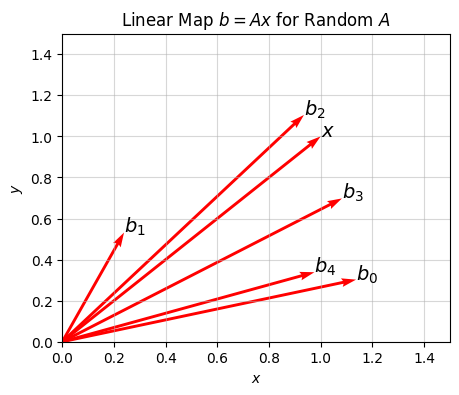

In [42]:
x = np.array([1, 1]).reshape(-1, 1) # create column vector x = [1, 1]
np.random.seed(1) # need this to ensure we get the same vectors every run
bs = []
for i in range(5):
    A = np.random.rand(2, 2) # generate a random (2, 2) matrix A
    b = A @ x # the matrix-vector multiply b = Ax
    bs.append(b)
vectors = [x] + bs # to plot x and all the b vectors
labels = ['$x$'] + [f'$b_{i}$' for i in range(len(bs))] # to plot the labels
plot_vectors(vectors, xlim=(0, 1.5), ylim=(0, 1.5), labels=labels, title='Linear Map $b=Ax$ for Random $A$')

### The Singular Value Decomposition (SVD)

Observe that multiplying $\mathbf{x}$ by $\mathbf{A}$ can be thought of geometrically as doing 3 different things:
1. Rescaling $\mathbf{x}$ by some scalar, call it $\sigma$.
2. Rotating $\mathbf{x}$ by some angle, call it $\theta$.
3. If $\mathbf{A}$ is not square, mapping $\mathbf{x}$ to a new vector space of dimension $m$.

That's really all a linear map $\mathbf{b}=\mathbf{A}\mathbf{x}$ does! It rescales the input vector and rotates it, and if $\mathbf{A}$ isn't square it also maps it into a different-sized vector space.

It turns out that we can separate these 3 distinct behaviors out into 3 distinct matrices, each doing only one of these steps. The idea is to *factor* the matrix $\mathbf{A}$ into a product of 3 different special matrices $\mathbf{U}, \Sigma, \mathbf{V}$:
$$\mathbf{A} = \mathbf{U} \Sigma \mathbf{V}^\top.$$
Each of these 3 special matrices do one thing for $\mathbf{A}$:
- $\mathbf{V}$ rotates $\mathbf{x}$ in its original space.
- $\Sigma$ rescales $\mathbf{x}$ in its original space.
- $\mathbf{U}$ maps $\mathbf{x}$ to a new space and rotates it again in the new space.

The matrix $\Sigma$ is called the **singular value matrix**, a special example of a **diagonal matrix**. Diagonal matrices are non-zero only on the main diagonal, and zero everywhere else. All they can do is scale vectors, not rotate them. 

The matrices $\mathbf{U}$ and $\mathbf{V}$ on the other hand do the opposite. They can only rotate vectors, not rescale them. These are called **orthogonal matrices**, and satisfy the special condition $$\mathbf{U}\mathbf{U}^\top=\mathbf{I}, \quad \mathbf{V}\mathbf{V}^\top=\mathbf{I}.$$

It turns out that these three matrices performed in sequence will *always* reproduce the action of the original matrix $\mathbf{A}$. This is a major theorem which I won't prove, one of the most important in linear algebra for sure. 

The matrix factorization I just described is called the **Singular Value Decomposition** or **SVD**. We will see it again when we get to unsupervised learning (the SVD is essentially all the PCA algorithm is).

We can get the SVD of a matrix in numpy by using the function `np.linalg.svd`, which returns a tuple of the three factored matrices $(\mathbf{U}, \Sigma, \mathbf{V})$. Here's an example. 

Note the function returns the singular value matrix $\Sigma$ as a diagonal vector instead of the full matrix itself to save space. We can get the full matrix back by calling `np.diag` again on the diagonal vector. I'll use this to verify the SVD indeed gives back the original matrix $\mathbf{A}$.

In [43]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
U, Sigma, V = np.linalg.svd(A)
U, Sigma, V

(array([[-0.21483724,  0.88723069,  0.40824829],
        [-0.52058739,  0.24964395, -0.81649658],
        [-0.82633754, -0.38794278,  0.40824829]]),
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]),
 array([[-0.47967118, -0.57236779, -0.66506441],
        [-0.77669099, -0.07568647,  0.62531805],
        [-0.40824829,  0.81649658, -0.40824829]]))

In [44]:
U @ np.diag(Sigma) @ V

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

## Tensors

Just as we considered rank-1 arrays (vectors) and rank-2 arrays (matrices), we can also consider rank-3 arrays, rank-4 arrays, etc. These more general-rank arrays are called **tensors**. As an example, a rank-3 tensor $\textbf{T}$ is an array of shape $(n,m,p)$. Its elements are represented using 3 indices $T_{i,j,k}$. A rank-3 tensor will have $n \cdot m \cdot p$ total elements.

Here's an example of a rank-3 tensor of all ones with shape $(2, 3, 2)$. We can quickly define such an array in numpy by using `np.ones` and passing in the shape of array we want to generate. Notice how the output essentially looks like 2 matrices of shape $(3,2)$ stacked on top of each other. Those 2 stackings are what the extra dimension gives you.

In [45]:
T = np.ones((2, 3, 2))
T.shape
T

(2, 3, 2)

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

Indexing into tensors is done just like with matrices, except we have extra dimensions.

In [46]:
T[0, 0, 0]
T[-1, -1, -1]
T[:, 0, 0]

1.0

1.0

array([1., 1.])

Tensors can be thought of in many different ways depending on the application, but for now, just think of them as different-shaped arrays for storing data. For example, we can store color (RGB) images using a rank-3 tensor. We can also store a corpus of text as a rank-3 tensor, as well as a clip of multi-channel audio. We can store video using a rank-4 tensor. Etc. We'll come back to these more general objects in a future lesson when we get to deep learning, where we'll use generally use pytorch instead of numpy to work with these objects.

## Broadcasting

To finish this section I want to talk a little bit about the concept of broadcasting, which is essentially a set of conventions for doing array operations on arrays with improper shapes. This may seem like a strange thing to do, but it turns out knowing how and when to broadcast can make your code much shorter, more readable, and efficient. All major numerical array libraries in modern-day python support broadcasting, including numpy, pytorch, tensorflow, etc. So it's a useful thing to learn.

### Motivation

Let's start with a simple example. Suppose we have an array of floats `x = np.array([1., 2., 3., 4., 5.])`. We'd like to add 1 to every number in the array. How can we do it? One "pythonic" way might be to use a list comprehension like so. This will work just fine, but it requires going back and forth between arrays and lists.

In [47]:
x = np.array([1, 2, 3, 4, 5]).astype(float)
x

array([1., 2., 3., 4., 5.])

In [48]:
x_plus_1 = np.array([val + 1 for val in x])
x_plus_1

array([2., 3., 4., 5., 6.])

What if we didn't want to go back and forth like that? It is slow after all. Anytime numpy has to handoff back to python or vice versa it's going to slow things down. Another thing we could try is to make a vector of ones of the same size as `x`, then add it to `x`. This is also fine, but it requires defining this extra array of ones just to add 1 to the original array.

In [49]:
ones = np.ones(len(x))
x_plus_1 = x + ones
x_plus_1

array([2., 3., 4., 5., 6.])

We'd *like* to be able to just add 1 to the array like we would with numbers. If `x` were a single number we'd just write `x + 1` to add one to it, right? But technically we can't do this if `x` is an array, since `x` has shape `(5,)` and 1 is just a number with no shape. This is where broadcasting comes in. Broadcasting says let's *define* the operation `x + 1` so that it *means* add 1 to every element of `x`.

In [50]:
x_plus_1 = x + 1
x_plus_1

array([2., 3., 4., 5., 6.])

This notation has the advantage of keeping array equations simple, while at the same time keeping all operations in numpy so that they run fast.

### Broadcasting Rules

Suppose now that we have two arrays `A` and `B` of arbitrary shape and we want to operate on them, e.g. via the operations `+, -, *, /, //, **`. Here are the general broadcasting rules, quoted directly from the [numpy documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html).

> **Numpy Documentation**<br><br>When operating on two arrays, numpy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are **compatible** when <br><br>1. they are equal, or<br>2. one of them is 1 <br><br>If these conditions are not met, a `ValueError: operands could not be broadcast together` exception is thrown, indicating that the arrays have **incompatible** shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.

Let's look at an example. First, suppose `A` has shape `(2, 2, 3)` and `B` has shape `(3,)`. Let's suppose for simplicity that they're both arrays of all ones. 

```
A: 2 , 2 , 3
B:         3
------------
C: 2 , 2 , 3
```

Here are the broadcasting steps that will take place. Note that only `B` will change in this example. `A` will stay fixed.
- Numpy will start in the rightmost dimension, checking if they're equal.
- Begin with `A` of shape `(2, 2, 3)` and `B` of shape `(3,)`.
- In this case, the rightmost dimension is `3` in both arrays, so we have a match.
- Moving left by one, `B` no longer has anymore dimensions, but `A` has two, each `2`. These arrays are thus compatible.
- Numpy will now copy `B` to the left in these new dimensions until it has the same shape as `A`.

```
1. Copy values of B twice to get B = [[1, 1, 1], [1, 1, 1]] with shape (2, 3)
2. Copy values of B twice to get B = [[[1, 1, 1], [1, 1, 1]], [[1, 1, 1], [1, 1, 1]]] with shape (2, 2, 3)
```
- The shapes of A and B are now equal. The output array `C` will have shape `(2, 2, 3)`.

Let's verify this is true on two simple arrays of ones. Let's also print out what `C` looks like. Since only copying is taking place we should just be adding 2 arrays of ones, hence the output should sum 2 arrays of ones, giving one array `C` of twos.

In [51]:
A = np.ones((2, 2, 3))
B = np.ones(3,)
A.shape, B.shape

((2, 2, 3), (3,))

In [52]:
C = A + B
C.shape

(2, 2, 3)

In [53]:
C

array([[[2., 2., 2.],
        [2., 2., 2.]],

       [[2., 2., 2.],
        [2., 2., 2.]]])

Let's do one more example. Suppose now that `A` has shape `(8, 1, 6, 1)` and `B` has shape `(7, 1, 5)`.

```
A: 8 , 1 , 6 , 1
B:     7 , 1 , 5
----------------
C: 8 , 7 , 6 , 5
```

Here are the broadcasting steps that will take place.
- Starting again from the right, dimensions `1` and `5` don't match. But since `A` has a `1` rule (2) applies, so `A` will broadcast itself (i.e. copy its values) 5 times in this dimension to match `B`. 
- Moving left by one we get `6` and `1`. Now `B` will broadcast itself in this dimension 6 times to match `A`. 
- Moving left again we get `1` and `7`. Now `A` will broadcast itself in this dimension 7 times to match `B`. 
- Last, we get `8` in `A` and `B` is out of dimensions, so `B` will broadcast itself 8 times to match `A`. 
- The shapes of `A` and `B` are now equal. The output `C` thus has shape `(8, 7, 6, 5)`.

Here again is an example on two arrays of ones. Verify that the shapes come out right.

In [54]:
A = np.ones((8, 1, 6, 1))
B = np.ones((7, 1, 5))
A.shape, B.shape

((8, 1, 6, 1), (7, 1, 5))

In [55]:
C = A / B
C.shape

(8, 7, 6, 5)

That's pretty much all there is to broadcasting. It's a systematic way of trying to copy the dimensions in each array until they both have the same shape. All this broadcasting is done under the hood for you when you try to operate on two arrays of different shapes. You don't need to do anything but understand *how* the arrays get broadcast together so you can avoid very subtle errors in your calculations.

This can be a bit confusing to understand I'm sure. We'll practice broadcasting a good bit in future lessons to help you get the hang of it. Before long it should become second nature to you.